<a href="https://colab.research.google.com/github/driano1221/ControleEst/blob/main/Trabalho_regress%C3%A3o_pre%C3%A7o_x_vari%C3%A1veis_industriais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise da Relação entre o Preço do Minério de Ferro e a Produção Industrial Brasileira

## Introdução

O setor industrial é um dos pilares fundamentais para o desenvolvimento econômico de um país, influenciando diretamente indicadores como emprego, renda e inovação tecnológica. No Brasil, a indústria de transformação desempenha um papel crucial, e sua performance pode ser influenciada por diversos fatores, incluindo os preços de commodities estratégicas, como o minério de ferro.

O minério de ferro é um dos principais produtos de exportação do Brasil, impactando significativamente a balança comercial e o desempenho econômico nacional. Variações em seu preço podem ter efeitos em cadeia sobre diversos setores industriais, especialmente aqueles que dependem direta ou indiretamente desse insumo.

Este trabalho tem como objetivo analisar a relação entre o preço do minério de ferro e a produção em diferentes segmentos da indústria de transformação brasileira. Especificamente, serão investigadas as seguintes categorias:

- **Indústria de Transformação** (geral)
- **Produtos de Metal - Exceto Máquinas e Equipamentos**
- **Máquinas e Equipamentos**
- **Veículos Automotores, Reboques e Carrocerias**

## Metodologia

Para atingir os objetivos propostos, será realizada uma análise econométrica utilizando regressões lineares simples pelo método dos Mínimos Quadrados Ordinários (MQO). A análise abrangerá o período de maio de 2021 a abril de 2024, conforme os dados disponibilizados.

As etapas principais do estudo incluem:

1. **Coleta e Preparação dos Dados**: Importação dos dados a partir de um arquivo Excel, tratamento de eventuais valores ausentes e formatação adequada das variáveis para análise.

2. **Análise Descritiva**: Exploração inicial dos dados para compreender tendências, variações e possíveis correlações entre as variáveis.

3. **Modelagem Econométrica**:
   - Estimativa de quatro modelos de regressão linear simples e um modelo de regressão múltipla
   - Avaliação dos coeficientes estimados, níveis de significância estatística (p-valores) e coeficientes de determinação (R²) para cada modelo.

4. **Diagnóstico dos Modelos**:
   - Análise dos resíduos para verificar a adequação dos modelos às premissas do MQO (homocedasticidade, normalidade dos resíduos e ausência de autocorrelação).
   - Utilização de gráficos de dispersão, gráficos de resíduos e QQ plots para visualização e interpretação dos resultados.

5. **Interpretação dos Resultados**:
   - Discussão sobre a influência do preço do minério de ferro em cada segmento da indústria analisada.
   - Identificação de quais setores são mais sensíveis às variações do preço do minério de ferro.

6. **Conclusões e Recomendações**:
   - Síntese dos achados do estudo, destacando as implicações econômicas e industriais.
   - Sugestões para pesquisas futuras ou políticas públicas que possam mitigar efeitos negativos ou potencializar impactos positivos identificados.


## Os modelos estimados serão:

- **Modelo 1**: Regressão linear simples entre o preço do minério de ferro e a **Indústria de Transformação**.
- **Modelo 2**: Regressão linear simples entre o preço do minério de ferro e **Produtos de Metal - Exceto Máquinas e Equipamentos**.
- **Modelo 3**: Regressão linear simples entre o preço do minério de ferro e **Máquinas e Equipamentos**.
- **Modelo 4**: Regressão linear simples entre o preço do minério de ferro e **Veículos Automotores, Reboques e Carrocerias**.
- **Modelo Múltiplo**: Regressão linear múltipla considerando o preço do minério de ferro e as três variáveis acima como preditoras da **Indústria de Transformação**.

## Objetivos

- **Quantificar** a relação entre o preço do minério de ferro e a produção em cada setor industrial selecionado.
- **Determinar** a significância estatística dessa relação e o grau de explicação do modelo para as variações observadas nas produções setoriais.
- **Identificar** possíveis discrepâncias ou comportamentos atípicos que possam sugerir a influência de outros fatores não contemplados no modelo.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from sklearn.linear_model import LinearRegression


df = pd.read_excel('data price.xlsx')

print(df.head())



        Data       price  Indústria de transformação  \
0 2021-05-01  202.857143                        22.8   
1 2021-06-01  215.815789                         7.3   
2 2021-07-01  214.340909                         7.9   
3 2021-08-01  162.090909                         9.0   
4 2021-09-01  113.718750                         0.6   

   Produtos de metal - exceto máquinas e equipamentos  \
0                                               37.5    
1                                               24.0    
2                                               17.1    
3                                               12.5    
4                                               11.1    

   Máquinas e equipamentos  Veículos automotores, reboques e carrocerias  
0                    114.5                                         123.3  
1                     84.5                                          53.9  
2                     52.6                                          85.2  
3                   

In [3]:
# Converter a coluna 'Data' para datetime
df['Data'] = pd.to_datetime(df['Data'])



Data                                                  0
price                                                 0
Indústria de transformação                            0
Produtos de metal - exceto máquinas e equipamentos    0
Máquinas e equipamentos                               0
Veículos automotores, reboques e carrocerias          0
dtype: int64


In [5]:
# Variável independente
X = df['price']

# Variáveis dependentes
y1 = df['Indústria de transformação']
y2 = df['Produtos de metal - exceto máquinas e equipamentos']
y3 = df['Máquinas e equipamentos']
y4 = df['Veículos automotores, reboques e carrocerias']


**Criamos uma função para automatizar o processo para cada variável dependente.**



In [6]:
def regressao_linear_simples(X, y, y_label):
    # Adicionar constante para o modelo OLS
    X_const = sm.add_constant(X)

    # Ajustar o modelo OLS
    modelo = sm.OLS(y, X_const).fit()

    # Exibir o resumo do modelo
    print(f"Resumo da Regressão para {y_label}:\n")
    print(modelo.summary())
    print("\n" + "-"*80 + "\n")

    # Plotar o gráfico de dispersão com a linha de regressão
    plt.figure(figsize=(10,6))
    sns.regplot(x=X, y=y, line_kws={'color': 'red'})
    plt.xlabel('Preço do Minério de Ferro')
    plt.ylabel(y_label)
    plt.title(f'Regressão Linear Simples: {y_label} vs Preço do Minério de Ferro')
    plt.show()

    # Plotar os resíduos
    residuos = modelo.resid
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=modelo.fittedvalues, y=residuos)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Valores Ajustados')
    plt.ylabel('Resíduos')
    plt.title(f'Resíduos vs Valores Ajustados para {y_label}')
    plt.show()

    # QQ Plot dos resíduos
    plt.figure(figsize=(10,6))
    qqplot(residuos, line='s')
    plt.title(f'QQ Plot dos Resíduos para {y_label}')
    plt.show()

    # Retornar o modelo para análises adicionais, se necessário
    return modelo


## Modelo 1

Resumo da Regressão para Indústria de Transformação:

                                OLS Regression Results                                
Dep. Variable:     Indústria de transformação   R-squared:                       0.271
Model:                                    OLS   Adj. R-squared:                  0.250
Method:                         Least Squares   F-statistic:                     12.64
Date:                        Sat, 21 Sep 2024   Prob (F-statistic):            0.00113
Time:                                23:54:30   Log-Likelihood:                -120.25
No. Observations:                          36   AIC:                             244.5
Df Residuals:                              34   BIC:                             247.7
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.97

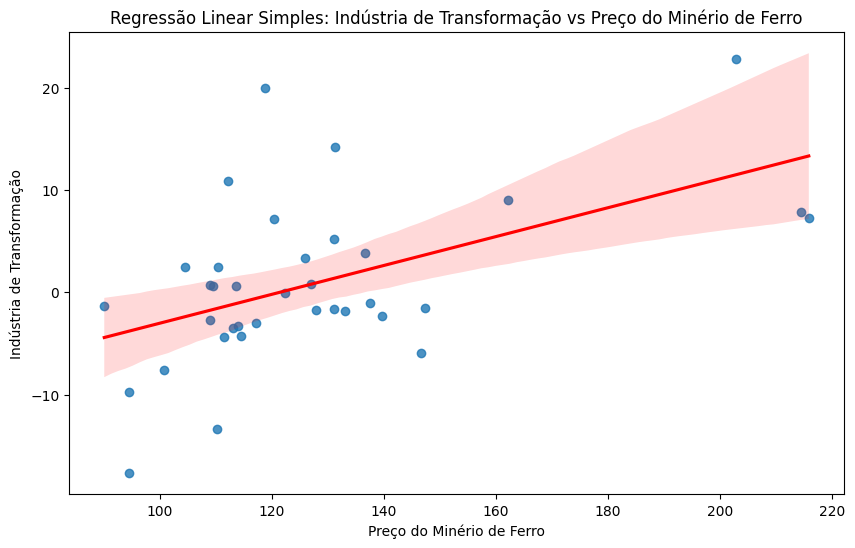

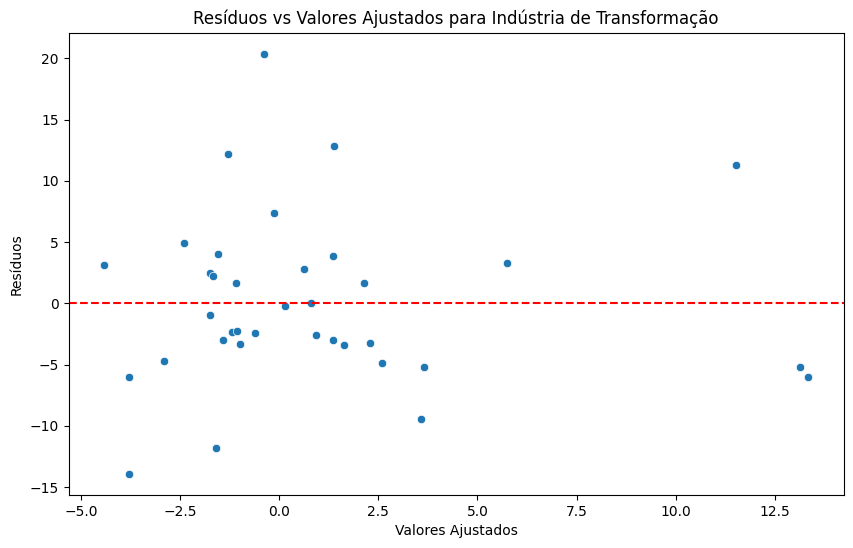

<Figure size 1000x600 with 0 Axes>

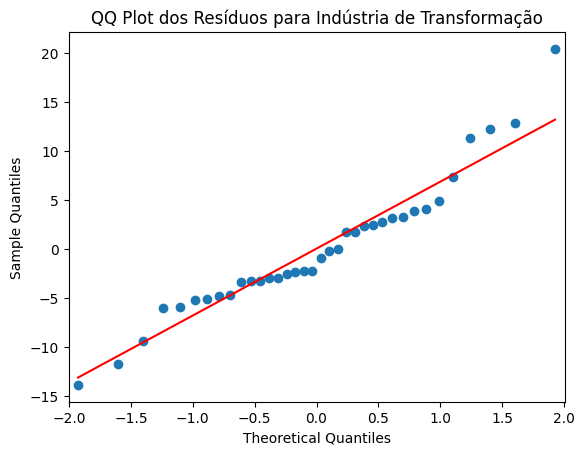

In [8]:
modelo1 = regressao_linear_simples(X, y1, 'Indústria de Transformação')


**Resumo do Modelo:**

- **Coeficiente de Determinação (R²)**: 0,271
- **Coeficientes:**
  - Intercepto (\(\beta_0\)): -17,1613
  - Coeficiente do preço (\(\beta_1\)): 0,1413
- **Estatística F**: 12,64 (p-valor = 0,00113)
- **Significância dos Coeficientes**:
  - Intercepto: p-valor = 0,002
  - Coeficiente do preço: p-valor = 0,001

**Interpretação:**

- **R² de 0,271** indica que aproximadamente 27,1% da variação na produção da indústria de transformação é explicada pelo preço do minério de ferro.
- **Coeficiente positivo (0,1413)** sugere que, em média, um aumento de 1 unidade no preço do minério de ferro está associado a um aumento de 0,1413 unidades na produção da indústria de transformação.
- **P-valores significativos** para o intercepto e o coeficiente do preço indicam que ambos são estatisticamente diferentes de zero ao nível de significância de 5%.

**Diagnósticos:**

- **Teste de Normalidade (Omnibus)**: Probabilidade de 0,049 sugere um modelo com resíduos aproximadamente normai.
- **Durbin-Watson**: 1,379 indica alguma autocorrelação positiva dos resíduos.



## Modelo 2

Resumo da Regressão para Produtos de Metal - Exceto Máquinas e Equipamentos:

                                            OLS Regression Results                                            
Dep. Variable:     Produtos de metal - exceto máquinas e equipamentos   R-squared:                       0.270
Model:                                                            OLS   Adj. R-squared:                  0.248
Method:                                                 Least Squares   F-statistic:                     12.55
Date:                                                Sat, 21 Sep 2024   Prob (F-statistic):            0.00117
Time:                                                        23:56:15   Log-Likelihood:                -135.28
No. Observations:                                                  36   AIC:                             274.6
Df Residuals:                                                      34   BIC:                             277.7
Df Model:                         

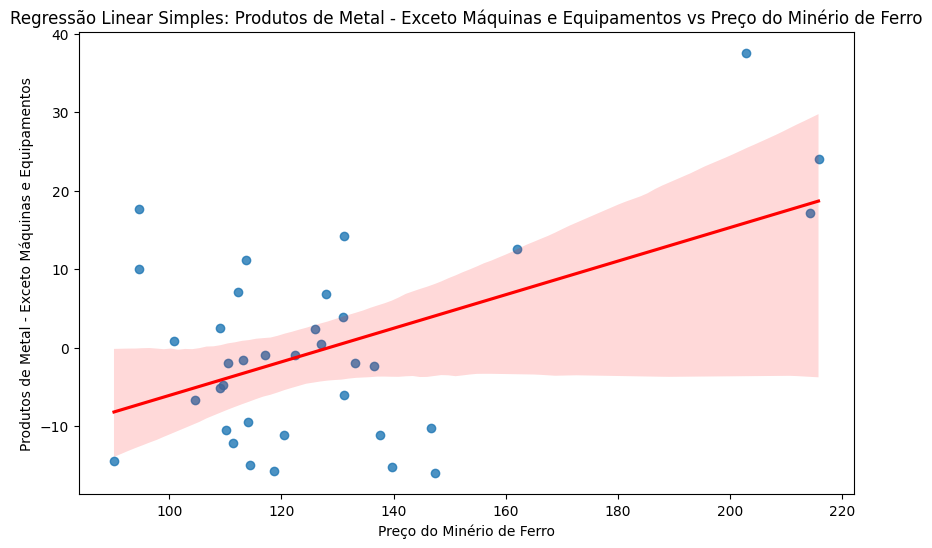

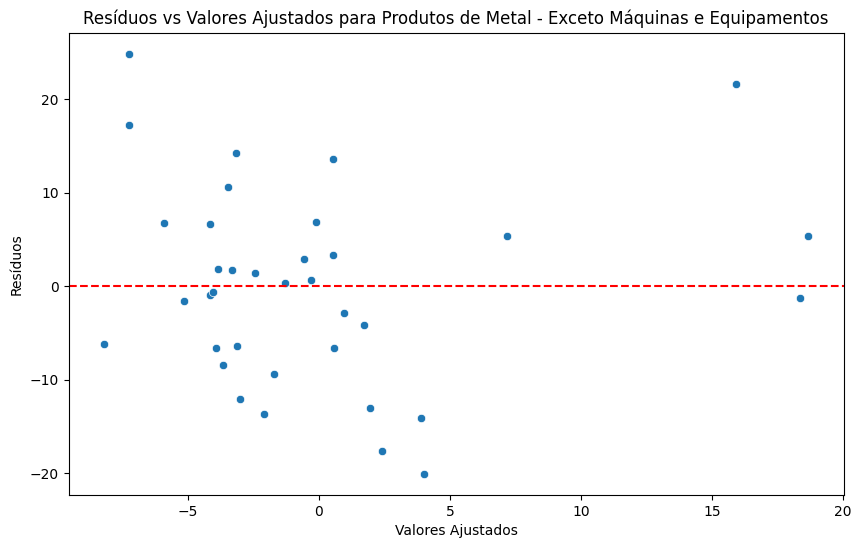

<Figure size 1000x600 with 0 Axes>

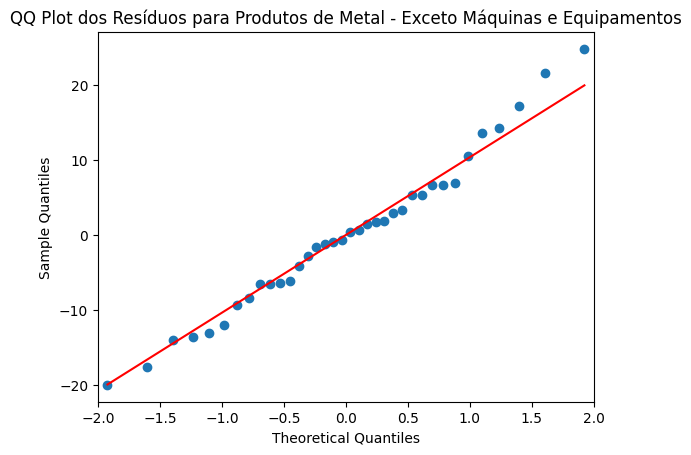

In [10]:
modelo2 = regressao_linear_simples(X, y2, 'Produtos de Metal - Exceto Máquinas e Equipamentos')


**Resumo do Modelo:**

- **R²**: 0,270
- **Coeficientes:**
  - Intercepto: -27,4660
  - Coeficiente do preço: 0,2138
- **Estatística F**: 12,55 (p-valor = 0,00117)
- **Significância dos Coeficientes**:
  - Intercepto: p-valor = 0,001
  - Coeficiente do preço: p-valor = 0,001

**Interpretação:**

- **R² de 0,270** indica que 27% da variação na produção de produtos de metal é explicada pelo preço do minério de ferro.
- **Coeficiente positivo (0,2138)** mostra uma relação direta entre o preço do minério e a produção do setor.
- **P-valores significativos** para ambos os coeficientes confirmam a relevância estatística.

**Diagnósticos:**

- **Teste de Normalidade (Omnibus)**: Probabilidade de 0,645 indica que não há evidência significativa contra a normalidade dos resíduos.
- **Durbin-Watson**: 1,153 sugere possível autocorrelação positiva dos resíduos.


## Modelo 3

Resumo da Regressão para Máquinas e Equipamentos:

                               OLS Regression Results                              
Dep. Variable:     Máquinas e equipamentos   R-squared:                       0.402
Model:                                 OLS   Adj. R-squared:                  0.384
Method:                      Least Squares   F-statistic:                     22.86
Date:                     Sat, 21 Sep 2024   Prob (F-statistic):           3.29e-05
Time:                             23:56:30   Log-Likelihood:                -166.19
No. Observations:                       36   AIC:                             336.4
Df Residuals:                           34   BIC:                             339.5
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

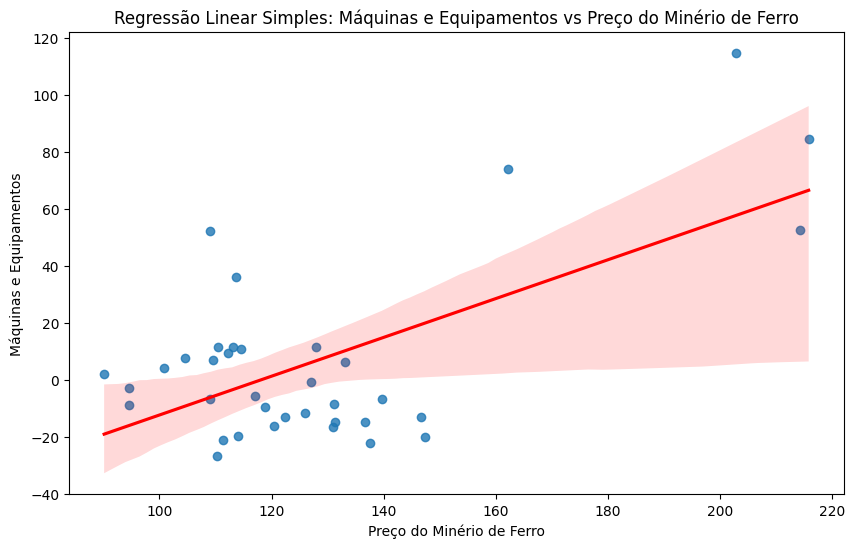

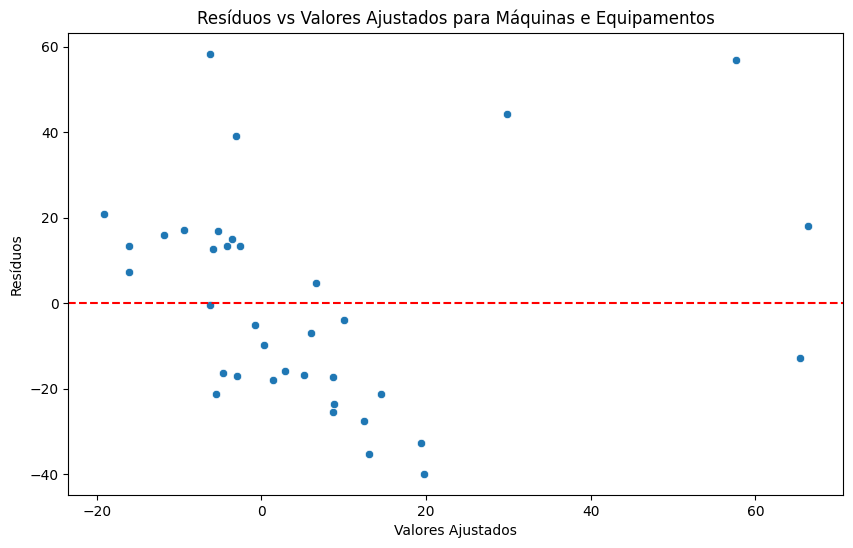

<Figure size 1000x600 with 0 Axes>

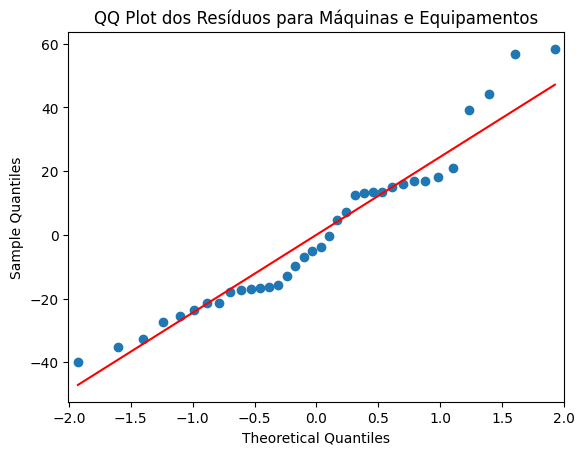

In [11]:
modelo3 = regressao_linear_simples(X, y3, 'Máquinas e Equipamentos')


**Resumo do Modelo:**

- **R²**: 0,402
- **Coeficientes:**
  - Intercepto: -80,5049
  - Coeficiente do preço: 0,6808
- **Estatística F**: 22,86 (p-valor = 3,29e-05)
- **Significância dos Coeficientes**:
  - Intercepto: p-valor = 0,000
  - Coeficiente do preço: p-valor = 0,000

**Interpretação:**

- **R² de 0,402** indica que 40,2% da variação na produção de máquinas e equipamentos é explicada pelo preço do minério de ferro.
- **Coeficiente positivo (0,6808)** sugere uma forte relação direta.
- **P-valores extremamente significativos** para ambos os coeficientes.

**Diagnósticos:**

- **Teste de Normalidade (Omnibus)**: Probabilidade de 0,248 indica que os resíduos são aproximadamente normais.
- **Durbin-Watson**: 1,165 aponta para possível autocorrelação positiva.


## Modelo 4

Resumo da Regressão para Veículos Automotores, Reboques e Carrocerias:

                                         OLS Regression Results                                         
Dep. Variable:     Veículos automotores, reboques e carrocerias   R-squared:                       0.400
Model:                                                      OLS   Adj. R-squared:                  0.383
Method:                                           Least Squares   F-statistic:                     22.71
Date:                                          Sat, 21 Sep 2024   Prob (F-statistic):           3.45e-05
Time:                                                  23:56:40   Log-Likelihood:                -167.32
No. Observations:                                            36   AIC:                             338.6
Df Residuals:                                                34   BIC:                             341.8
Df Model:                                                     1                         

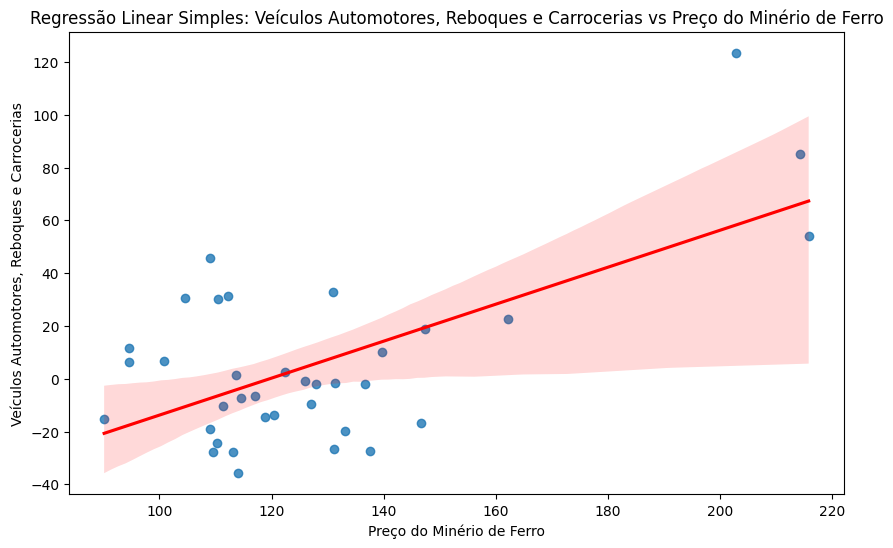

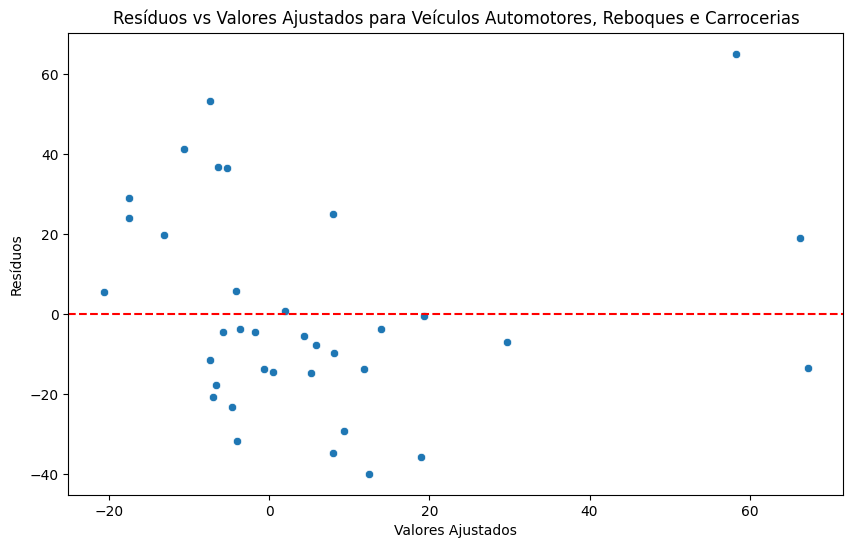

<Figure size 1000x600 with 0 Axes>

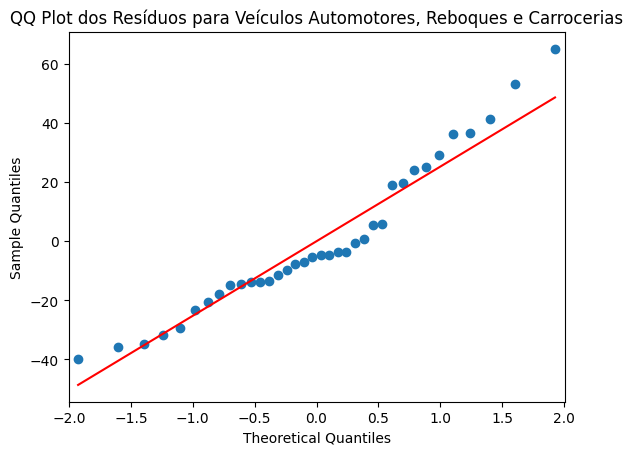

In [12]:
modelo4 = regressao_linear_simples(X, y4, 'Veículos Automotores, Reboques e Carrocerias')


**Resumo do Modelo:**

- **R²**: 0,400
- **Coeficientes:**
  - Intercepto: -83,7988
  - Coeficiente do preço: 0,7002
- **Estatística F**: 22,71 (p-valor = 3,45e-05)
- **Significância dos Coeficientes**:
  - Intercepto: p-valor = 0,000
  - Coeficiente do preço: p-valor = 0,000

**Interpretação:**

- **R² de 0,400** indica que 40% da variação na produção de veículos é explicada pelo preço do minério de ferro.
- **Coeficiente positivo (0,7002)** demonstra uma relação direta significativa.
- **P-valores altamente significativos**.

**Diagnósticos:**

- **Teste de Normalidade (Omnibus)**: Probabilidade de 0,165 não indica violação da normalidade.
- **Durbin-Watson**: 1,673 está próximo de 2, sugerindo independência dos resíduos.


## Modelo Extra - Regressão múltipla

In [13]:
# Variável dependente
y = df['Indústria de transformação']

# Variáveis independentes
X = df[['price', 'Produtos de metal - exceto máquinas e equipamentos',
        'Máquinas e equipamentos', 'Veículos automotores, reboques e carrocerias']]
X_const = sm.add_constant(X)
# Ajustar o modelo
modelo_multiplo = sm.OLS(y, X_const).fit()

# Exibir o resumo do modelo
print(modelo_multiplo.summary())


                                OLS Regression Results                                
Dep. Variable:     Indústria de transformação   R-squared:                       0.370
Model:                                    OLS   Adj. R-squared:                  0.289
Method:                         Least Squares   F-statistic:                     4.556
Date:                        Sun, 22 Sep 2024   Prob (F-statistic):            0.00520
Time:                                00:00:18   Log-Likelihood:                -117.62
No. Observations:                          36   AIC:                             245.2
Df Residuals:                              31   BIC:                             253.2
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------

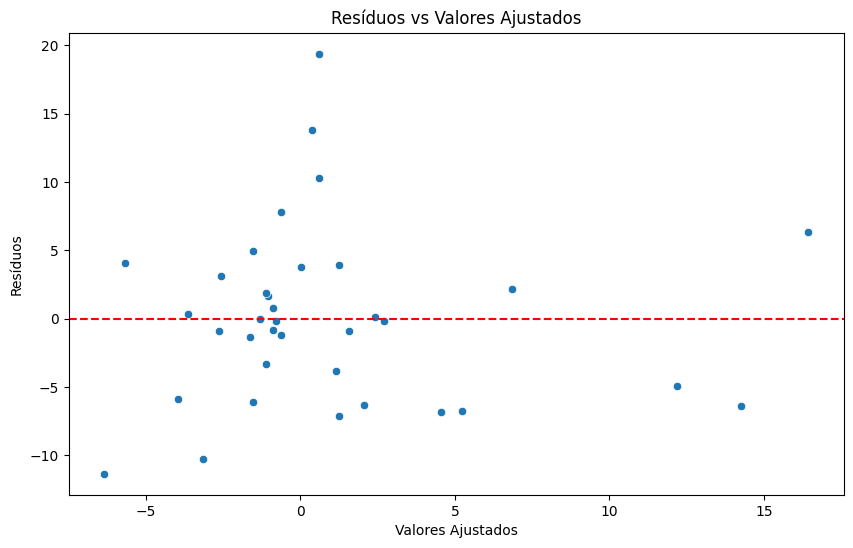

<Figure size 1000x600 with 0 Axes>

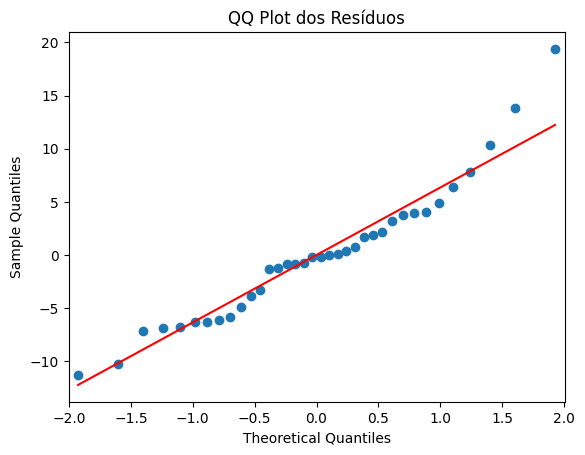

In [15]:
# Calcular resíduos
residuos = modelo_multiplo.resid

# Plotar resíduos vs valores ajustados
plt.figure(figsize=(10,6))
sns.scatterplot(x=modelo_multiplo.fittedvalues, y=residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Valores Ajustados')
plt.show()
# QQ Plot dos resíduos
plt.figure(figsize=(10,6))
qqplot(residuos, line='s')
plt.title('QQ Plot dos Resíduos')
plt.show()


In [17]:
from statsmodels.stats.diagnostic import het_breuschpagan
# Teste de Breusch-Pagan
bp_test = het_breuschpagan(residuos, modelo_multiplo.model.exog)
labels = ['Estatística LM', 'p-valor LM', 'Estatística F', 'p-valor F']
print(dict(zip(labels, bp_test)))


{'Estatística LM': 1.5861344932684047, 'p-valor LM': 0.8112820152692877, 'Estatística F': 0.35719737210066194, 'p-valor F': 0.8370338885461974}


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calcular VIF
vif = pd.DataFrame()
vif["Variável"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


                                            Variável       VIF
0                                              price  1.215986
1  Produtos de metal - exceto máquinas e equipame...  2.321517
2                            Máquinas e equipamentos  2.431251
3       Veículos automotores, reboques e carrocerias  2.172677


**Resumo do Modelo Múltiplo:**

- **Variável Dependente**: Indústria de Transformação
- **Variáveis Independentes**: Preço do Minério de Ferro, Produtos de Metal, Máquinas e Equipamentos, Veículos Automotores
- **R²**: 0,370
- **Coeficientes:**
  - Intercepto: -10,2890 (p-valor = 0,138)
  - Preço: 0,0801 (p-valor = 0,147)
  - Produtos de Metal: -0,2083 (p-valor = 0,156)
  - Máquinas e Equipamentos: 0,0640 (p-valor = 0,276)
  - Veículos Automotores: 0,0888 (p-valor = 0,108)
- **Estatística F**: 4,556 (p-valor = 0,00520)

**Interpretação:**

- **R² de 0,370** indica que 37% da variação na indústria de transformação é explicada pelas variáveis independentes do modelo.
- **Coeficientes não significativos**: Nenhum dos coeficientes individuais é estatisticamente significativo ao nível de 5%.
- **Estatística F significativa**: O modelo como um todo é significativo (p-valor < 0,05), sugerindo que pelo menos uma variável independente tem um efeito sobre a variável dependente.

**Diagnósticos:**

- **Teste de Normalidade (Omnibus)**: Probabilidade de 0,030 indica alguma violação da normalidade dos resíduos.
- **Durbin-Watson**: 1,183 sugere autocorrelação positiva dos resíduos.
- **Teste de Homocedasticidade (Breusch-Pagan)**:
  - Estatística LM: 1,5861 (p-valor = 0,8113) indica que não há evidência de heterocedasticidade.
- **Fatores de Inflação da Variância (VIF)**:

| Variável                                              | VIF     |
|-------------------------------------------------------|---------|
| price                                                 | 1,216   |
| Produtos de metal - exceto máquinas e equipamentos    | 2,322   |
| Máquinas e equipamentos                               | 2,431   |
| Veículos automotores, reboques e carrocerias          | 2,173   |

- **Interpretação do VIF**: Valores de VIF abaixo de 5 indicam que não há problemas significativos de multicolinearidade.


## Conclusão geral


### Coeficiente de Determinação (R²)

- **Modelos Simples**:
  - Modelo 1: R² = 0,271
  - Modelo 2: R² = 0,270
  - Modelo 3: R² = 0,402
  - Modelo 4: R² = 0,400
- **Modelo Múltiplo**: R² = 0,370

O modelo múltiplo apresenta um R² intermediário em comparação aos modelos simples, explicando 37% da variação na indústria de transformação.

### Significância dos Coeficientes

- **Modelos Simples**: Os coeficientes dos modelos simples são estatisticamente significativos ao nível de 5%.
- **Modelo Múltiplo**: Nenhum coeficiente individual é significativo ao nível de 5%, embora o modelo como um todo seja significativo.

### Diagnósticos dos Resíduos

- **Normalidade**: Alguns modelos simples apresentam melhores indicadores de normalidade dos resíduos do que o modelo múltiplo.
- **Autocorrelação**: O modelo múltiplo apresenta maior evidência de autocorrelação positiva dos resíduos (Durbin-Watson = 1,183).

### Multicolinearidade

- **Modelo Múltiplo**: VIFs abaixo de 5 indicam que a multicolinearidade não é um problema significativo.

## Conclusões Gerais

1. **Relação Positiva nos Modelos Simples**: Há evidências estatísticas de uma relação positiva e significativa entre o preço do minério de ferro e os setores analisados individualmente.

2. **Modelo Múltiplo com Coeficientes Não Significativos**: No modelo múltiplo, os coeficientes individuais não são significativos, embora o modelo como um todo seja.

3. **Explicação da Variância**:
   - **Modelos Simples**: Os modelos para **Máquinas e Equipamentos** e **Veículos Automotores** explicam cerca de 40% da variação em suas respectivas variáveis dependentes.
   - **Modelo Múltiplo**: Explica 37% da variação na indústria de transformação, mas com coeficientes individuais não significativos.

4. **Diagnósticos dos Modelos**:
   - **Modelos Simples**: Apresentam algumas preocupações com autocorrelação dos resíduos.
   - **Modelo Múltiplo**: Indica problemas com normalidade dos resíduos e autocorrelação.

## Recomendações

- **Preferência pelos Modelos Simples**: Dado que os coeficientes nos modelos simples são estatisticamente significativos e os modelos apresentam melhores ajustes individuais, é preferível utilizar os modelos simples para entender a relação entre o preço do minério de ferro e cada setor específico.


A análise sugere que o preço do minério de ferro tem uma influência significativa e positiva nos setores analisados quando considerados individualmente. No entanto, quando todas as variáveis são incluídas em um modelo múltiplo, essa significância individual se perde, possivelmente devido à inter-relação entre os setores ou à insuficiência de observações para captar os efeitos simultaneamente.
